# 3. Data transformation

Taken from [the book](https://r4ds.hadley.nz/data-transform).


In [1]:
library(nycflights13)
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Exploring the data


In [2]:
glimpse(flights)


Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

In [4]:
head(flights)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


## Intro to `dplyr`


In [6]:
flights |>
  filter(dest == "IAH") |>
  group_by(year, month, day) |>
  summarize(
    arr_delay = mean(arr_delay, na.rm = TRUE)
  ) |>
  head()


`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,arr_delay
<int>,<int>,<int>,<dbl>
2013,1,1,17.850000
2013,1,2,7.000000
2013,1,3,18.315789
2013,1,4,-3.200000
2013,1,5,20.230769
2013,1,6,9.277778


In [9]:
flights |>
  filter(dep_delay > 120) |>
  head(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
2013,1,1,957,733,144,1056,853,123,UA,856,N534UA,EWR,BOS,37,200,7,33,2013-01-01 07:00:00
2013,1,1,1114,900,134,1447,1222,145,UA,1086,N76502,LGA,IAH,248,1416,9,0,2013-01-01 09:00:00
2013,1,1,1540,1338,122,2020,1825,115,B6,705,N570JB,JFK,SJU,193,1598,13,38,2013-01-01 13:00:00
2013,1,1,1815,1325,290,2120,1542,338,EV,4417,N17185,EWR,OMA,213,1134,13,25,2013-01-01 13:00:00
2013,1,1,1842,1422,260,1958,1535,263,EV,4633,N18120,EWR,BTV,46,266,14,22,2013-01-01 14:00:00
2013,1,1,1856,1645,131,2212,2005,127,AA,181,N323AA,JFK,LAX,336,2475,16,45,2013-01-01 16:00:00
2013,1,1,1934,1725,129,2126,1855,151,MQ,4255,N909MQ,JFK,BNA,154,765,17,25,2013-01-01 17:00:00
2013,1,1,1938,1703,155,2109,1823,166,EV,4300,N18557,EWR,RIC,68,277,17,3,2013-01-01 17:00:00


In [21]:
# Flights that departed on January 1
flights |>
  filter(month == 1 & day == 1) |>
  sample_n(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,1318,1322,-4,1358,1416,-18,EV,4106,N19554,EWR,BDL,25,116,13,22,2013-01-01 13:00:00
2013,1,1,805,800,5,1118,1106,12,B6,3,N570JB,JFK,FLL,165,1069,8,0,2013-01-01 08:00:00
2013,1,1,857,905,-8,1107,1120,-13,DL,181,N321NB,LGA,DTW,110,502,9,5,2013-01-01 09:00:00
2013,1,1,1251,1252,-1,1611,1555,16,B6,85,N657JB,JFK,FLL,173,1069,12,52,2013-01-01 12:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,1515,1437,38,1834,1742,52,B6,347,N178JB,JFK,SRQ,171,1041,14,37,2013-01-01 14:00:00
2013,1,1,1005,1000,5,1239,1234,5,UA,1625,N81449,EWR,DEN,254,1605,10,0,2013-01-01 10:00:00
2013,1,1,1720,1725,-5,2121,2105,16,DL,513,N723TW,JFK,LAX,363,2475,17,25,2013-01-01 17:00:00
2013,1,1,1456,1500,-4,1649,1632,17,UA,685,N802UA,LGA,ORD,140,733,15,0,2013-01-01 15:00:00


In [20]:
# Flights that departed in January or February
flights |>
  filter(month == 1 | month == 2) |>
  sample_n(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,16,2008,2005,3,2254,2258,-4,UA,405,N411UA,EWR,MCO,141,937,20,5,2013-01-16 20:00:00
2013,1,28,900,905,-5,1125,1115,10,MQ,4478,N739MQ,LGA,DTW,109,502,9,5,2013-01-28 09:00:00
2013,2,16,1758,1745,13,2114,2136,-22,DL,31,N721TW,JFK,SFO,348,2586,17,45,2013-02-16 17:00:00
2013,1,18,1541,1530,11,1755,1734,21,US,1665,N716UW,LGA,CLT,86,544,15,30,2013-01-18 15:00:00
2013,1,24,2348,2359,-11,418,444,-26,B6,739,N605JB,JFK,PSE,193,1617,23,59,2013-01-24 23:00:00
2013,2,18,1600,1604,-4,1718,1739,-21,UA,1053,N76254,EWR,ORD,120,719,16,4,2013-02-18 16:00:00
2013,2,27,2020,1900,80,2144,2018,86,EV,5714,N827AS,JFK,IAD,48,228,19,0,2013-02-27 19:00:00
2013,2,18,2022,2010,12,2325,2321,4,UA,1299,N37255,EWR,RSW,164,1068,20,10,2013-02-18 20:00:00
2013,1,21,601,608,-7,654,725,-31,UA,733,N822UA,EWR,BOS,32,200,6,8,2013-01-21 06:00:00


In [23]:
# A shorter way to select flights that departed in January or February
flights |>
  filter(month %in% c(1, 2)) |>
  sample_n(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,24,919,920,-1,1242,1233,9,UA,1275,N57869,EWR,LAX,332,2454,9,20,2013-01-24 09:00:00
2013,1,4,810,810,0,1029,1030,-1,FL,346,N899AT,LGA,ATL,115,762,8,10,2013-01-04 08:00:00
2013,1,6,1126,1130,-4,1253,1306,-13,EV,4431,N16151,EWR,RDU,75,416,11,30,2013-01-06 11:00:00
2013,1,22,1105,1105,0,1241,1245,-4,WN,542,N443WN,LGA,MDW,121,725,11,5,2013-01-22 11:00:00
2013,1,31,1801,1800,1,1922,1913,9,US,2185,N748UW,LGA,DCA,47,214,18,0,2013-01-31 18:00:00
2013,1,30,1523,1345,98,1754,1641,73,B6,1783,N805JB,JFK,MCO,139,944,13,45,2013-01-30 13:00:00
2013,1,25,730,710,20,933,850,43,MQ,3737,N507MQ,EWR,ORD,129,719,7,10,2013-01-25 07:00:00
2013,1,5,537,540,-3,831,850,-19,AA,1141,N5DBAA,JFK,MIA,153,1089,5,40,2013-01-05 05:00:00
2013,2,26,1556,1605,-9,1912,1911,1,B6,157,N794JB,JFK,MCO,157,944,16,5,2013-02-26 16:00:00


## Intro to `arrange`


In [25]:
flights |>
  arrange(desc(year), desc(month), desc(day), desc(dep_time)) |>
  head(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,12,31,2356,2359,-3,436,445,-9,B6,745,N665JB,JFK,PSE,200,1617,23,59,2013-12-31 23:00:00
2013,12,31,2355,2359,-4,430,440,-10,B6,1503,N509JB,JFK,SJU,195,1598,23,59,2013-12-31 23:00:00
2013,12,31,2332,2245,47,58,3,55,B6,486,N334JB,JFK,ROC,60,264,22,45,2013-12-31 22:00:00
2013,12,31,2328,2330,-2,412,409,3,B6,1389,N651JB,EWR,SJU,198,1608,23,30,2013-12-31 23:00:00
2013,12,31,2321,2250,31,46,8,38,B6,2002,N179JB,JFK,BUF,66,301,22,50,2013-12-31 22:00:00
2013,12,31,2310,2255,15,7,2356,11,B6,718,N279JB,JFK,BOS,40,187,22,55,2013-12-31 22:00:00
2013,12,31,2245,2250,-5,2359,2356,3,B6,1816,N318JB,JFK,SYR,51,209,22,50,2013-12-31 22:00:00
2013,12,31,2235,2245,-10,2351,2355,-4,B6,234,N355JB,JFK,BTV,49,266,22,45,2013-12-31 22:00:00
2013,12,31,2218,2219,-1,315,304,11,B6,1203,N625JB,JFK,SJU,202,1598,22,19,2013-12-31 22:00:00


## Intro to `distinct`


In [29]:
# Remove duplicate rows, if any
flights |>
  distinct() |>
  sample_n(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,6,29,1354,1349,5,1459,1504,-5,B6,118,N318JB,JFK,BOS,42,187,13,49,2013-06-29 13:00:00
2013,5,21,1903,1909,-6,2159,2235,-36,B6,87,N633JB,JFK,SLC,265,1990,19,9,2013-05-21 19:00:00
2013,9,19,1830,1830,0,2037,2029,8,DL,548,N316US,EWR,DTW,78,488,18,30,2013-09-19 18:00:00
2013,5,7,1440,1445,-5,1623,1645,-22,US,1445,N193UW,LGA,CLT,78,544,14,45,2013-05-07 14:00:00
2013,10,11,843,850,-7,1001,1003,-2,EV,3810,N14907,EWR,BUF,44,282,8,50,2013-10-11 08:00:00
2013,5,19,2248,2130,78,29,2247,102,EV,4378,N12564,EWR,BTV,60,266,21,30,2013-05-19 21:00:00
2013,6,19,1635,1635,0,1935,1954,-19,B6,15,N821JB,JFK,FLL,148,1069,16,35,2013-06-19 16:00:00
2013,4,21,1449,1455,-6,1630,1632,-2,9E,3318,N907XJ,JFK,BUF,56,301,14,55,2013-04-21 14:00:00
2013,10,17,843,825,18,1131,1120,11,UA,478,N483UA,EWR,MCO,128,937,8,25,2013-10-17 08:00:00


In [30]:
# Find all possible destinations
flights |>
  distinct(dest) |>
  head(10)


dest
<chr>
IAH
MIA
BQN
ATL
ORD
FLL
IAD
MCO
PBI


In [26]:
# Find all unique origin and destination pairs
flights |>
  distinct(origin, dest) |>
  sample_n(10)


origin,dest
<chr>,<chr>
LGA,SAV
EWR,AVL
JFK,TPA
LGA,HOU
EWR,IND
JFK,ABQ
JFK,BOS
JFK,HOU
LGA,CVG


In [33]:
# Keep the other columns as well
flights |>
  distinct(origin, dest, .keep_all = TRUE) |>
  head(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


## Intro to `count`


In [35]:
# Top 10 routes
flights |>
  count(origin, dest, sort = TRUE) |>
  head(10)


origin,dest,n
<chr>,<chr>,<int>
JFK,LAX,11262
LGA,ATL,10263
LGA,ORD,8857
JFK,SFO,8204
LGA,CLT,6168
EWR,ORD,6100
JFK,BOS,5898
LGA,MIA,5781
JFK,MCO,5464


## Exercises


### Exercise 1.

In a single pipeline for each condition, find all flights that meet the condition:

- Had an arrival delay of two or more hours
- Flew to Houston (IAH or HOU)
- Were operated by United, American, or Delta
- Departed in summer (July, August, and September)
- Arrived more than two hours late, but didn’t leave late
- Were delayed by at least an hour, but made up over 30 minutes in flight


In [3]:
head(flights)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [8]:
flights |>
  filter(arr_delay / 60 >= 2) |>
  filter(dest %in% c("IAH", "HOU")) |>
  filter(carrier %in% c("UA", "AA", "DL")) |>
  filter(month %in% c(7, 8, 9)) |>
  sample_n(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,9,22,2000,1700,180,2232,1955,157,AA,211,N3DDAA,JFK,IAH,184,1417,17,0,2013-09-22 17:00:00
2013,7,10,1629,1520,69,2048,1754,174,UA,646,N578UA,EWR,IAH,187,1400,15,20,2013-07-10 15:00:00
2013,8,9,1850,1730,80,2221,2007,134,UA,268,N524UA,EWR,IAH,182,1400,17,30,2013-08-09 17:00:00
2013,7,22,1524,1249,155,1902,1541,201,UA,215,N430UA,LGA,IAH,187,1416,12,49,2013-07-22 12:00:00
2013,7,22,2018,1735,163,2344,2030,194,AA,1901,N3CAAA,JFK,IAH,196,1417,17,35,2013-07-22 17:00:00
2013,7,9,1937,1735,122,2240,2030,130,AA,1901,N3ARAA,JFK,IAH,174,1417,17,35,2013-07-09 17:00:00
2013,8,22,1956,1735,141,2239,2030,129,AA,1901,N3EEAA,JFK,IAH,182,1417,17,35,2013-08-22 17:00:00
2013,9,2,1833,1520,193,2105,1810,175,UA,498,N497UA,EWR,IAH,184,1400,15,20,2013-09-02 15:00:00
2013,8,16,1652,1259,233,1935,1551,224,UA,643,N428UA,LGA,IAH,198,1416,12,59,2013-08-16 12:00:00


### Exercise 2

Sort flights to find the flights with longest departure delays. Find the flights that left earliest in the morning.


In [10]:
flights |>
  arrange(desc(dep_delay), dep_time, .keep_all = TRUE) |>
  head(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00


### Exercise 3

Sort flights to find the fastest flights. (Hint: Try including a math calculation inside of your function.)


In [12]:
flights |>
  arrange(arr_time - (dep_time - 2400), .keep_all = TRUE) |>
  head(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,7,17,2400,2142,138,54,2259,115,EV,3832,N22971,EWR,DCA,37,199,21,42,2013-07-17 21:00:00
2013,12,9,2400,2250,70,59,2356,63,B6,1816,N187JB,JFK,SYR,41,209,22,50,2013-12-09 22:00:00
2013,6,12,2338,2129,129,17,2235,102,EV,4276,N11109,EWR,BDL,21,116,21,29,2013-06-12 21:00:00
2013,12,29,2332,2155,97,14,2300,74,EV,4682,N13955,EWR,ALB,26,143,21,55,2013-12-29 21:00:00
2013,11,6,2335,2215,80,18,2317,61,EV,4233,N23139,EWR,ALB,29,143,22,15,2013-11-06 22:00:00
2013,2,25,2347,2145,122,30,2239,111,EV,4378,N18557,EWR,BWI,33,169,21,45,2013-02-25 21:00:00
2013,8,13,2351,2152,119,35,2258,97,EV,4276,N15574,EWR,BDL,24,116,21,52,2013-08-13 21:00:00
2013,10,11,2342,2030,192,27,2205,142,WN,2520,N279WN,EWR,MDW,92,711,20,30,2013-10-11 20:00:00
2013,2,26,2356,2000,236,41,2104,217,EV,4162,N10575,EWR,ALB,24,143,20,0,2013-02-26 20:00:00


### Exercise 4

Was there a flight on every day of 2013?


In [16]:
flights |>
  distinct(year, month, day) |>
  nrow()


[1] 365

### Exercise 5

Which flights traveled the farthest distance? Which traveled the least distance?


In [17]:
flights |>
  arrange(desc(distance), .keep_all = TRUE) |>
  head(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,857,900,-3,1516,1530,-14,HA,51,N380HA,JFK,HNL,659,4983,9,0,2013-01-01 09:00:00
2013,1,2,909,900,9,1525,1530,-5,HA,51,N380HA,JFK,HNL,638,4983,9,0,2013-01-02 09:00:00
2013,1,3,914,900,14,1504,1530,-26,HA,51,N380HA,JFK,HNL,616,4983,9,0,2013-01-03 09:00:00
2013,1,4,900,900,0,1516,1530,-14,HA,51,N384HA,JFK,HNL,639,4983,9,0,2013-01-04 09:00:00
2013,1,5,858,900,-2,1519,1530,-11,HA,51,N381HA,JFK,HNL,635,4983,9,0,2013-01-05 09:00:00
2013,1,6,1019,900,79,1558,1530,28,HA,51,N385HA,JFK,HNL,611,4983,9,0,2013-01-06 09:00:00
2013,1,7,1042,900,102,1620,1530,50,HA,51,N385HA,JFK,HNL,612,4983,9,0,2013-01-07 09:00:00
2013,1,8,901,900,1,1504,1530,-26,HA,51,N389HA,JFK,HNL,645,4983,9,0,2013-01-08 09:00:00
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00


In [19]:
flights |>
  arrange(distance, .keep_all = TRUE) |>
  head(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,7,27,NA,106,NA,NA,245,NA,US,1632,NA,EWR,LGA,NA,17,1,6,2013-07-27 01:00:00
2013,1,3,2127,2129,-2,2222,2224,-2,EV,3833,N13989,EWR,PHL,30,80,21,29,2013-01-03 21:00:00
2013,1,4,1240,1200,40,1333,1306,27,EV,4193,N14972,EWR,PHL,30,80,12,0,2013-01-04 12:00:00
2013,1,4,1829,1615,134,1937,1721,136,EV,4502,N15983,EWR,PHL,28,80,16,15,2013-01-04 16:00:00
2013,1,4,2128,2129,-1,2218,2224,-6,EV,4645,N27962,EWR,PHL,32,80,21,29,2013-01-04 21:00:00
2013,1,5,1155,1200,-5,1241,1306,-25,EV,4193,N14902,EWR,PHL,29,80,12,0,2013-01-05 12:00:00
2013,1,6,2125,2129,-4,2224,2224,0,EV,4619,N22909,EWR,PHL,22,80,21,29,2013-01-06 21:00:00
2013,1,7,2124,2129,-5,2212,2224,-12,EV,4619,N33182,EWR,PHL,25,80,21,29,2013-01-07 21:00:00
2013,1,8,2127,2130,-3,2304,2225,39,EV,4619,N11194,EWR,PHL,30,80,21,30,2013-01-08 21:00:00


### Exercise 6

Does it matter what order you used filter() and arrange() if you’re using both? Why/why not? Think about the results and how much work the functions would have to do.

**Answer:** yes. Running `filter` and then `arrange` is more efficiente since `arrange` will have less rows to sort through. Functionally both ways return the same result but running `filter` first is generally faster.


## Intro to `mutate`


In [3]:
flights |>
  mutate(
    gain = dep_delay - arr_delay,
    speed = distance / (air_time / 60),
    .before = 1
  ) |>
  sample_n(10)


gain,speed,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2,343.5938,2013,5,10,1704,1500,124,1847,1645,⋯,AA,341,N4YJAA,LGA,ORD,128,733,15,0,2013-05-10 15:00:00
18,356.5289,2013,11,22,1653,1650,3,1809,1824,⋯,UA,708,N825UA,EWR,ORD,121,719,16,50,2013-11-22 16:00:00
-22,377.1041,2013,12,21,1016,1025,-9,1353,1340,⋯,AA,1131,N3ACAA,LGA,DFW,221,1389,10,25,2013-12-21 10:00:00
12,426.4000,2013,8,21,725,739,-14,907,933,⋯,EV,4691,N13161,EWR,DAY,75,533,7,39,2013-08-21 07:00:00
-7,413.8065,2013,1,10,1524,1530,-6,1856,1855,⋯,AA,1039,N3DWAA,JFK,FLL,155,1069,15,30,2013-01-10 15:00:00
23,438.2609,2013,9,1,825,829,-4,1000,1027,⋯,DL,1157,N321NB,EWR,MSP,138,1008,8,29,2013-09-01 08:00:00
-4,332.4000,2013,12,26,1825,1824,1,1950,1945,⋯,EV,4131,N15574,EWR,RIC,50,277,18,24,2013-12-26 18:00:00
33,463.9877,2013,5,11,2018,1931,47,2319,2305,⋯,B6,171,N529JB,JFK,SMF,326,2521,19,31,2013-05-11 19:00:00
-13,418.0435,2013,6,4,1518,1500,18,1753,1722,⋯,EV,4971,N398CA,LGA,CHS,92,641,15,0,2013-06-04 15:00:00


In [6]:
flights |>
  mutate(
    gain = dep_delay - arr_delay,
    speed = distance / (air_time / 60),
    .after = day
  ) |>
  sample_n(10)


year,month,day,gain,speed,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,2,22,-18,393.3333,653,659,-6,1011,959,⋯,AA,1815,N5EXAA,JFK,MCO,144,944,6,59,2013-02-22 06:00:00
2013,9,11,-49,418.9655,1802,1735,27,2116,2000,⋯,WN,401,N756SA,LGA,DEN,232,1620,17,35,2013-09-11 17:00:00
2013,2,28,19,416.5161,655,700,-5,950,1014,⋯,DL,1879,N330NW,LGA,FLL,155,1076,7,0,2013-02-28 07:00:00
2013,9,26,19,449.7744,1135,1140,-5,1404,1428,⋯,UA,1618,N37253,EWR,TPA,133,997,11,40,2013-09-26 11:00:00
2013,6,1,-5,416.0000,706,630,36,844,803,⋯,EV,3266,N15572,EWR,RDU,60,416,6,30,2013-06-01 06:00:00
2013,10,11,9,456.7742,543,545,-2,816,827,⋯,UA,1714,N29717,LGA,IAH,186,1416,5,45,2013-10-11 05:00:00
2013,12,4,9,375.4054,1640,1650,-10,1946,2005,⋯,AA,1171,N3GUAA,LGA,DFW,222,1389,16,50,2013-12-04 16:00:00
2013,5,17,-6,445.5882,1938,1940,-2,2247,2243,⋯,DL,1435,N953DL,LGA,TPA,136,1010,19,40,2013-05-17 19:00:00
2013,11,2,-7,425.0000,1147,1150,-3,1344,1340,⋯,MQ,3616,N523MQ,LGA,MSP,144,1020,11,50,2013-11-02 11:00:00


In [7]:
flights |>
  mutate(
    gain = dep_delay - arr_delay,
    hours = air_time / 60,
    gain_per_hour = gain / hours,
    .keep = "used"
  ) |>
  sample_n(10)


dep_delay,arr_delay,air_time,gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-7,12,96,-19,1.6000000,-11.875000
10,11,52,-1,0.8666667,-1.153846
5,-10,323,15,5.3833333,2.786378
22,26,224,-4,3.7333333,-1.071429
67,20,321,47,5.3500000,8.785047
-4,-20,111,16,1.8500000,8.648649
62,44,63,18,1.0500000,17.142857
16,0,192,16,3.2000000,5.000000
-4,17,152,-21,2.5333333,-8.289474


## Intro to `select`


In [8]:
flights |>
  select(year, month, day) |>
  sample_n(10)


year,month,day
<int>,<int>,<int>
2013,12,9
2013,10,22
2013,3,14
2013,9,23
2013,9,15
2013,7,6
2013,8,13
2013,3,2
2013,10,25


In [9]:
flights |>
  select(year:day) |>
  sample_n(10)


year,month,day
<int>,<int>,<int>
2013,1,19
2013,6,12
2013,6,11
2013,12,19
2013,7,12
2013,12,8
2013,9,15
2013,6,6
2013,11,16


In [10]:
flights |>
  select(!year:day) |>
  sample_n(10)


dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
839,845,-6,1014,1030,-16,EV,5288,N371CA,LGA,BUF,48,292,8,45,2013-10-23 08:00:00
1619,1630,-11,2011,2020,-9,VX,27,N843VA,JFK,SFO,388,2586,16,30,2013-01-23 16:00:00
NA,2155,NA,NA,2329,NA,EV,3267,N15983,EWR,ORF,NA,284,21,55,2013-07-22 21:00:00
611,615,-4,903,910,-7,AA,1895,N3GBAA,EWR,MIA,145,1085,6,15,2013-08-02 06:00:00
1059,1106,-7,1152,1209,-17,EV,4404,N14570,EWR,PVD,32,160,11,6,2013-06-09 11:00:00
752,800,-8,949,914,35,US,2165,N732US,LGA,DCA,60,214,8,0,2013-05-21 08:00:00
2053,2055,-2,2254,2250,4,MQ,4573,N737MQ,LGA,DTW,80,502,20,55,2013-03-08 20:00:00
1751,1755,-4,2052,2108,-16,B6,989,N587JB,JFK,FLL,155,1069,17,55,2013-02-05 17:00:00
1252,1300,-8,1404,1415,-11,US,2181,N732US,LGA,DCA,39,214,13,0,2013-10-08 13:00:00


In [11]:
flights |>
  select(where(is.character)) |>
  sample_n(10)


carrier,tailnum,origin,dest
<chr>,<chr>,<chr>,<chr>
MQ,N531MQ,LGA,BNA
B6,N521JB,LGA,MCO
UA,N29124,JFK,LAX
B6,N632JB,EWR,FLL
UA,N75432,EWR,PBI
UA,N38459,EWR,LAS
VX,N840VA,EWR,SFO
US,NA,LGA,BOS
DL,N3742C,JFK,LAS


In [14]:
flights |>
  select(matches("^(dep|arr).+")) |>
  sample_n(10)


dep_time,dep_delay,arr_time,arr_delay
<int>,<dbl>,<int>,<dbl>
727,45,937,47
1357,-3,1626,-5
1525,10,1800,20
1825,30,2029,1
2018,83,2310,50
1526,6,1824,34
734,-1,1013,5
1922,-3,2209,-33
1626,16,1816,18


In [15]:
flights |>
  select(starts_with("dep") | starts_with("arr")) |>
  sample_n(10)


dep_time,dep_delay,arr_time,arr_delay
<int>,<dbl>,<int>,<dbl>
722,-7,910,-44
853,-7,1043,-27
1240,-5,1531,-29
1045,-7,1322,-44
1318,18,1622,0
613,-2,915,20
1700,1,2025,-9
848,48,1107,35
1017,-6,1206,-12


In [16]:
flights |>
  select((starts_with("dep") | starts_with("arr")) & !ends_with("delay")) |>
  sample_n(10)


dep_time,arr_time
<int>,<int>
1238,1507
2040,107
917,1203
1052,1236
555,839
2109,2348
1619,1813
602,854
827,1015


In [17]:
flights |>
  select(tail_num = tailnum) |>
  sample_n(10)


tail_num
<chr>
N202WN
N925XJ
N3GBAA
N454UA
N316JB
N551UA
N544MQ
N3KJAA
N635VA


## Intro to `rename`


In [3]:
# Close to `select` but keeps all the other columns as well
flights |>
    rename(tail_num = tailnum) |>
    sample_n(10)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,5,7,2051,1755,176,2207,1930,157,MQ,4601,N532MQ,LGA,RDU,62,431,17,55,2013-05-07 17:00:00
2013,7,29,930,934,-4,1238,1249,-11,UA,1281,N12218,EWR,SFO,355,2565,9,34,2013-07-29 09:00:00
2013,4,24,1843,1850,-7,2143,2136,7,B6,527,N563JB,EWR,MCO,133,937,18,50,2013-04-24 18:00:00
2013,5,30,2203,1929,154,2332,2109,143,MQ,4569,N723MQ,LGA,RDU,65,431,19,29,2013-05-30 19:00:00
2013,5,14,1759,1759,0,2038,2049,-11,B6,391,N509JB,LGA,MCO,123,950,17,59,2013-05-14 17:00:00
2013,1,30,1837,1705,92,2005,1830,95,MQ,4410,N832MQ,JFK,DCA,56,213,17,5,2013-01-30 17:00:00
2013,6,14,644,641,3,927,940,-13,UA,1701,N38417,EWR,FLL,142,1065,6,41,2013-06-14 06:00:00
2013,2,22,1515,1516,-1,1733,1728,5,UA,594,N572UA,EWR,DEN,229,1605,15,16,2013-02-22 15:00:00
2013,10,16,802,808,-6,919,929,-10,B6,2702,N265JB,JFK,BUF,55,301,8,8,2013-10-16 08:00:00


## Intro to `relocate`


In [4]:
flights |>
  relocate(time_hour, air_time) |>
  sample_n(10)


time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-04-02 12:00:00,347,2013,4,2,1156,1200,-4,1523,1511,12,DL,863,N713TW,JFK,LAX,2475,12,0
2013-04-20 08:00:00,328,2013,4,20,807,810,-3,1111,1051,20,DL,1429,N655DL,JFK,LAS,2248,8,10
2013-11-08 09:00:00,123,2013,11,8,954,959,-5,1215,1241,-26,EV,4140,N13979,EWR,ATL,746,9,59
2013-10-19 11:00:00,85,2013,10,19,1055,1100,-5,1314,1304,10,DL,2452,N320NB,LGA,DTW,502,11,0
2013-02-10 09:00:00,316,2013,2,10,1032,950,42,1306,1311,-5,UA,499,N813UA,EWR,SEA,2402,9,50
2013-06-25 15:00:00,322,2013,6,25,1544,1530,14,1908,1850,18,DL,95,N195DN,JFK,LAX,2475,15,30
2013-11-05 13:00:00,139,2013,11,5,1311,1313,-2,1553,1609,-16,B6,505,N556JB,EWR,FLL,1065,13,13
2013-12-28 08:00:00,73,2013,12,28,753,805,-12,922,945,-23,MQ,3531,N845MQ,LGA,RDU,431,8,5
2013-04-25 12:00:00,111,2013,4,25,1149,1200,-11,1401,1354,7,US,1443,N711UW,JFK,CLT,541,12,0


In [5]:
flights |>
  relocate(year:dep_time, .after = time_hour) |>
  sample_n(10)


sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,year,month,day,dep_time
<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>,<int>,<int>,<int>
1440,-2,1725,1746,-21,DL,1902,N907DL,LGA,PBI,149,1035,14,40,2013-07-02 14:00:00,2013,7,2,1438
1400,-7,1445,1506,-21,B6,2480,N273JB,EWR,BOS,34,200,14,0,2013-09-16 14:00:00,2013,9,16,1353
1559,20,1940,1919,21,DL,1373,N3757D,JFK,MIA,148,1089,15,59,2013-08-22 15:00:00,2013,8,22,1619
810,-3,1042,1100,-18,UA,1218,N15710,EWR,DFW,198,1372,8,10,2013-09-24 08:00:00,2013,9,24,807
1830,0,2113,2055,18,UA,1236,N36472,EWR,DEN,258,1605,18,30,2013-06-15 18:00:00,2013,6,15,1830
2030,43,18,2350,28,B6,1069,N273JB,JFK,AUS,217,1521,20,30,2013-01-28 20:00:00,2013,1,28,2113
1445,6,1758,1616,102,UA,1290,N75432,EWR,CLE,61,404,14,45,2013-07-23 14:00:00,2013,7,23,1451
730,55,1235,1129,66,B6,1289,N584JB,EWR,SJU,214,1608,7,30,2013-07-29 07:00:00,2013,7,29,825
2055,-2,3,2359,4,B6,1205,N775JB,JFK,PDX,329,2454,20,55,2013-10-25 20:00:00,2013,10,25,2053


In [6]:
flights |>
  relocate(starts_with("arr"), .before = dep_time) |>
  sample_n(10)


year,month,day,arr_time,arr_delay,dep_time,sched_dep_time,dep_delay,sched_arr_time,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,6,13,1800,5,1458,1500,-2,1755,AA,1813,N5FKAA,JFK,MCO,132,944,15,0,2013-06-13 15:00:00
2013,2,24,1924,-41,1812,1820,-8,2005,AA,353,N3DUAA,LGA,ORD,115,733,18,20,2013-02-24 18:00:00
2013,6,27,1237,-32,1038,1040,-2,1309,UA,277,N473UA,EWR,LAS,279,2227,10,40,2013-06-27 10:00:00
2013,6,24,2400,214,2246,1859,227,2026,EV,4131,N11150,EWR,RIC,48,277,18,59,2013-06-24 18:00:00
2013,4,18,1627,169,1304,1200,64,1338,UA,617,N574UA,LGA,ORD,108,733,12,0,2013-04-18 12:00:00
2013,7,10,1155,-15,917,915,2,1210,AA,1,N320AA,JFK,LAX,302,2475,9,15,2013-07-10 09:00:00
2013,7,16,1940,2,1734,1728,6,1938,EV,4382,N11107,EWR,DTW,77,488,17,28,2013-07-16 17:00:00
2013,12,16,1440,-27,1351,1400,-9,1507,US,2150,N949UW,LGA,BOS,32,184,14,0,2013-12-16 14:00:00
2013,10,17,1856,9,1611,1600,11,1847,B6,543,N643JB,EWR,PBI,140,1023,16,0,2013-10-17 16:00:00


## Exercises


### Exercise 1

Compare `dep_time`, `sched_dep_time`, and `dep_delay`. How would you expect those three numbers to be related?


In [4]:
flights |>
  select(dep_time, sched_dep_time, dep_delay) |>
  mutate(
    dep_time = sprintf("%04s", dep_time),
    sched_dep_time = sprintf("%04s", sched_dep_time)
  ) |>
  mutate(
    dep_time_hms = hm(paste0(substr(dep_time, 1, 2), ":", substr(dep_time, 3, 4))),
    sched_dep_time_hms = hm(paste0(substr(sched_dep_time, 1, 2), ":", substr(sched_dep_time, 3, 4)))
  ) |>
  mutate(delay = as.numeric(dep_time_hms - sched_dep_time_hms) / 60, .after = dep_delay) |>
  sample_n(10)


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `dep_time_hms = hm(paste0(substr(dep_time, 1, 2), ":",
  substr(dep_time, 3, 4)))`.
Caused by warning in `.parse_hms()`:
! Some strings failed to parse”


dep_time,sched_dep_time,dep_delay,delay,dep_time_hms,sched_dep_time_hms
<chr>,<chr>,<dbl>,<dbl>,<Period>,<Period>
0635,0630,5,5,6H 35M 0S,6H 30M 0S
1822,1830,-8,-8,18H 22M 0S,18H 30M 0S
1827,1815,12,12,18H 27M 0S,18H 15M 0S
2304,1845,259,259,23H 4M 0S,18H 45M 0S
1744,1726,18,18,17H 44M 0S,17H 26M 0S
1655,1703,-8,-8,16H 55M 0S,17H 3M 0S
0643,0647,-4,-4,6H 43M 0S,6H 47M 0S
1716,1625,51,51,17H 16M 0S,16H 25M 0S
0839,0840,-1,-1,8H 39M 0S,8H 40M 0S


### Exercise 3

What happens if you specify the name of the same variable multiple times in a `select()` call?


In [6]:
flights |>
  select(dep_time, dep_time) |>
  sample_n(10)


dep_time
<int>
613
708
1604
2059
1635
922
1256
640
1854


### Exercise 4

What does the `any_of()` function do? Why might it be helpful in conjunction with this vector?


In [27]:
variables <- c("year", "month", "day", "dep_delay", "arr_delay")


In [29]:
flights |>
    select(any_of(variables)) |>
    sample_n(10)


year,month,day,dep_delay,arr_delay
<int>,<int>,<int>,<dbl>,<dbl>
2013,9,29,30,18
2013,9,4,28,26
2013,12,12,-6,-12
2013,4,13,-1,3
2013,12,22,-2,-3
2013,11,13,-2,-41
2013,4,5,28,83
2013,3,6,2,-15
2013,6,17,-8,-3


### Exerice 5

Does the result of running the following code surprise you? How do the select helpers deal with upper and lower case by default? How can you change that default?


In [31]:
flights |>
    select(contains("TIME")) |>
    sample_n(10)


dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,time_hour
<int>,<int>,<int>,<int>,<dbl>,<dttm>
1924,1935,2115,2137,79,2013-06-19 19:00:00
1711,1638,1823,1811,51,2013-07-30 16:00:00
1239,1245,1600,1600,179,2013-09-25 12:00:00
1950,1700,2142,1923,96,2013-08-12 17:00:00
556,600,700,715,107,2013-08-24 06:00:00
1306,1315,1422,1433,54,2013-04-10 13:00:00
821,822,1128,1141,349,2013-11-16 08:00:00
1400,1405,1654,1712,335,2013-11-19 14:00:00
554,600,721,745,124,2013-12-30 06:00:00


In [8]:
flights |>
    select(contains("time", ignore.case = FALSE)) |>
    sample_n(10)


dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,time_hour
<int>,<int>,<int>,<int>,<dbl>,<dttm>
1124,1006,1240,1125,46,2013-12-13 10:00:00
958,1000,1326,1341,365,2013-02-18 10:00:00
1310,1259,1525,1530,97,2013-05-14 12:00:00
1752,1800,1853,1919,41,2013-11-01 18:00:00
647,700,943,1001,161,2013-10-22 07:00:00
1951,1935,2050,2121,45,2013-05-16 19:00:00
628,615,730,715,42,2013-01-02 06:00:00
555,600,651,657,32,2013-05-14 06:00:00
656,700,1020,1014,169,2013-01-14 07:00:00


## Intro to `group_by`


In [14]:
flights |>
    group_by(month) |>
    head()


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


## Intro to `summarize`


In [12]:
flights |>
    group_by(month) |>
    summarize(
        avg_dep_delay = mean(dep_delay, na.rm = TRUE),
        nrows = n()
    ) |>
    arrange(desc(avg_dep_delay))


month,avg_dep_delay,nrows
<int>,<dbl>,<int>
7,21.727787,29425
6,20.846332,28243
12,16.576688,28135
4,13.938038,28330
3,13.227076,28834
5,12.986859,28796
8,12.611040,29327
2,10.816843,24951
1,10.036665,27004


## Intro to `slice_` functions

In [18]:
flights |>
    group_by(dest) |>
    slice_max(arr_delay, n = 1) |>
    relocate(dest) |>
    glimpse()


Rows: 108
Columns: 19
Groups: dest [105]
$ dest           <chr> "ABQ", "ACK", "ALB", "ANC", "ATL", "AUS", "AVL", "BDL",…
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 7, 7, 1, 8, 7, 7, 8, 2, 12, 4, 1, 3, 6, 9, 11, 6, 1, 12…
$ day            <int> 22, 23, 25, 17, 22, 10, 13, 21, 1, 10, 25, 8, 13, 12, 2…
$ dep_time       <int> 2145, 1139, 123, 1740, 2257, 2056, 1156, 1728, 1504, 25…
$ sched_dep_time <int> 2007, 800, 2000, 1625, 759, 1505, 832, 1316, 1056, 1900…
$ dep_delay      <dbl> 98, 219, 323, 75, 898, 351, 204, 252, 248, 325, 293, 37…
$ arr_time       <int> 132, 1250, 229, 2042, 121, 2347, 1417, 1839, 1628, 136,…
$ sched_arr_time <int> 2259, 909, 2101, 2003, 1026, 1758, 1029, 1413, 1230, 20…
$ arr_delay      <dbl> 153, 221, 328, 39, 895, 349, 228, 266, 238, 291, 364, 4…
$ carrier        <chr> "B6", "B6", "EV", "UA", "DL", "UA", "EV", "EV", "EV", "…
$ flight         <int> 1505, 1491, 4309, 887, 2047, 503, 4175, 4103, 5309, 503…

In [19]:
flights |>
    group_by(dest) |>
    slice_max(arr_delay, n = 1, with_ties = FALSE) |>
    relocate(dest) |>
    glimpse()


Rows: 105
Columns: 19
Groups: dest [105]
$ dest           <chr> "ABQ", "ACK", "ALB", "ANC", "ATL", "AUS", "AVL", "BDL",…
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 7, 7, 1, 8, 7, 7, 8, 2, 12, 4, 1, 3, 6, 9, 11, 6, 1, 12…
$ day            <int> 22, 23, 25, 17, 22, 10, 13, 21, 1, 10, 25, 8, 13, 12, 2…
$ dep_time       <int> 2145, 1139, 123, 1740, 2257, 2056, 1156, 1728, 1504, 25…
$ sched_dep_time <int> 2007, 800, 2000, 1625, 759, 1505, 832, 1316, 1056, 1900…
$ dep_delay      <dbl> 98, 219, 323, 75, 898, 351, 204, 252, 248, 325, 293, 37…
$ arr_time       <int> 132, 1250, 229, 2042, 121, 2347, 1417, 1839, 1628, 136,…
$ sched_arr_time <int> 2259, 909, 2101, 2003, 1026, 1758, 1029, 1413, 1230, 20…
$ arr_delay      <dbl> 153, 221, 328, 39, 895, 349, 228, 266, 238, 291, 364, 4…
$ carrier        <chr> "B6", "B6", "EV", "UA", "DL", "UA", "EV", "EV", "EV", "…
$ flight         <int> 1505, 1491, 4309, 887, 2047, 503, 4175, 4103, 5309, 503…

In [24]:
flights |>
    group_by(dest) |>
    summarize(max_arr_delay = max(arr_delay, na.rm = TRUE)) |>
    arrange(desc(max_arr_delay)) |>
    head(10)


Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `max_arr_delay = max(arr_delay, na.rm = TRUE)`.
ℹ In group 52: `dest = "LGA"`.
Caused by warning in `max()`:
! no non-missing arguments to max; returning -Inf”


dest,max_arr_delay
<chr>,<dbl>
HNL,1272
CMH,1127
ORD,1109
SFO,1007
CVG,989
TPA,931
MSP,915
ATL,895
MIA,878


## Grouping by multiple columns

Exercise 4 - Were there flights everyday of the year?

In [38]:
flights |>
    group_by(year, month, day) |>
    summarise(n_flights = n()) |>
    arrange(n_flights) |>
    head(10)


`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,n_flights
<int>,<int>,<int>,<int>
2013,11,28,634
2013,11,29,661
2013,1,19,674
2013,10,12,676
2013,1,26,680
2013,8,31,680
2013,2,2,682
2013,9,28,682
2013,2,9,684


In [39]:
flights |>
    group_by(year, month, day) |>
    summarise(n_flights = n(), .groups = "drop_last") |>
    arrange(desc(n_flights)) |>
    head(10)


year,month,day,n_flights
<int>,<int>,<int>,<int>
2013,11,27,1014
2013,7,11,1006
2013,7,8,1004
2013,7,10,1004
2013,12,2,1004
2013,7,18,1003
2013,7,25,1003
2013,7,12,1002
2013,7,9,1001


## Ungrouping

In [2]:
daily <- flights |>
    group_by(year, month, day)


In [3]:
daily |>
    ungroup() |>
    summarize(
        avg_delay = mean(dep_delay, na.rm = TRUE),
        flights = n()
    )


avg_delay,flights
<dbl>,<int>
12.63907,336776


## Using the `.by` argument

`.by` is available for `dplyr` 1.1 and above.

In [5]:
flights |>
    summarize(
        avg_delay = mean(dep_delay, na.rm = TRUE),
        n_flights = n(),
        .by = month
    ) |>
    arrange(desc(avg_delay))


month,avg_delay,n_flights
<int>,<dbl>,<int>
7,21.727787,29425
6,20.846332,28243
12,16.576688,28135
4,13.938038,28330
3,13.227076,28834
5,12.986859,28796
8,12.611040,29327
2,10.816843,24951
1,10.036665,27004


In [8]:
flights |>
    summarize(
        avg_delay = mean(dep_delay, na.rm = TRUE),
        n_flights = n(),
        .by = c(origin, dest, month)
    ) |>
    arrange(desc(avg_delay)) |>
    head(10)


origin,dest,month,avg_delay,n_flights
<chr>,<chr>,<int>,<dbl>,<int>
EWR,CAE,7,81.50000,8
EWR,TYS,7,81.22222,27
EWR,BZN,12,75.00000,4
EWR,TUL,7,72.61538,26
EWR,DSM,3,71.03846,26
EWR,CAE,12,68.25000,9
EWR,TYS,6,68.24138,29
LGA,SBN,11,67.50000,2
EWR,BWI,7,65.75000,4


Notice how you don't have to run `ungroup()` or pass the `.groups` argument to get rid of the grouping later.

## 3.5.7 Exercises

### 3.5.7.1

Which carrier has the worst average delays? Challenge: can you disentangle the effects of bad airports vs. bad carriers? Why/why not? (Hint: think about `flights |> group_by(carrier, dest) |> summarize(n())`)

In [21]:
avg_delay_by_carrier <- flights |>
    summarise(
        avg_delay = mean(dep_delay, na.rm = TRUE),
        .by = carrier
    ) |>
    arrange(desc(avg_delay))

avg_delay_by_carrier


carrier,avg_delay
<chr>,<dbl>
F9,20.215543
EV,19.955390
YV,18.996330
FL,18.726075
WN,17.711744
9E,16.725769
B6,13.022522
VX,12.869421
OO,12.586207


In [22]:
avg_delay_by_airport <- flights |>
    summarise(
        avg_delay = mean(dep_delay, na.rm = TRUE),
        .by = dest
    ) |>
    arrange(desc(avg_delay))

avg_delay_by_airport |> glimpse()


Rows: 105
Columns: 2
$ dest      <chr> "CAE", "TUL", "OKC", "BHM", "TYS", "JAC", "DSM", "RIC", "ALB…
$ avg_delay <dbl> 35.57009, 34.90635, 30.56881, 29.69485, 28.49396, 26.54545, …


In [27]:
flights |>
    summarise(
        avg_delay =  mean(dep_delay, na.rm = TRUE),
        n_flights = n(),
        .by = c(carrier, dest)
    ) |>
    left_join(avg_delay_by_carrier, by = "carrier") |>
    rename(avg_delay_per_carrier = avg_delay.x) |>
    left_join(avg_delay_by_airport, by = "dest") |>
    rename(avg_delay_per_airport = avg_delay.y) |>
    arrange(desc(avg_delay)) |>
    head(10)

carrier,dest,avg_delay_per_carrier,n_flights,avg_delay_per_airport,avg_delay
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
EV,CAE,36.701923,113,19.955390,35.57009
9E,CAE,-3.666667,3,16.725769,35.57009
EV,TUL,34.906355,315,19.955390,34.90635
EV,OKC,30.568807,346,19.955390,30.56881
EV,BHM,29.694853,297,19.955390,29.69485
EV,TYS,41.818471,323,19.955390,28.49396
9E,TYS,12.705660,308,16.725769,28.49396
UA,JAC,28.700000,23,12.106073,26.54545
DL,JAC,5.000000,2,9.264505,26.54545


### 3.5.7.2

Find the flights that are most delayed upon departure from each destination.

In [37]:
flights |>
    summarise(
        avg_delay = mean(dep_delay, na.rm = TRUE),
        .by = c(dest, flight)
    ) |>
    arrange(desc(avg_delay)) |>
    distinct(dest, .keep_all = TRUE) |>
    head(10)


dest,flight,avg_delay
<chr>,<int>,<dbl>
CLE,372,483
DEN,488,379
DTW,5017,372
BNA,521,346
MCO,468,334
SLC,809,298
IAH,1510,278
GSO,5478,242
PDX,593,239


### 3.5.7.3

How do delays vary over the course of the day? Illustrate your answer with a plot.

In [38]:
flights |> head(10)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [44]:
avg_delay_per_time <- flights |> 
    summarise(
        avg_delay_per_time = mean(dep_delay, na.rm = TRUE),
        .by = dep_time
    )

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


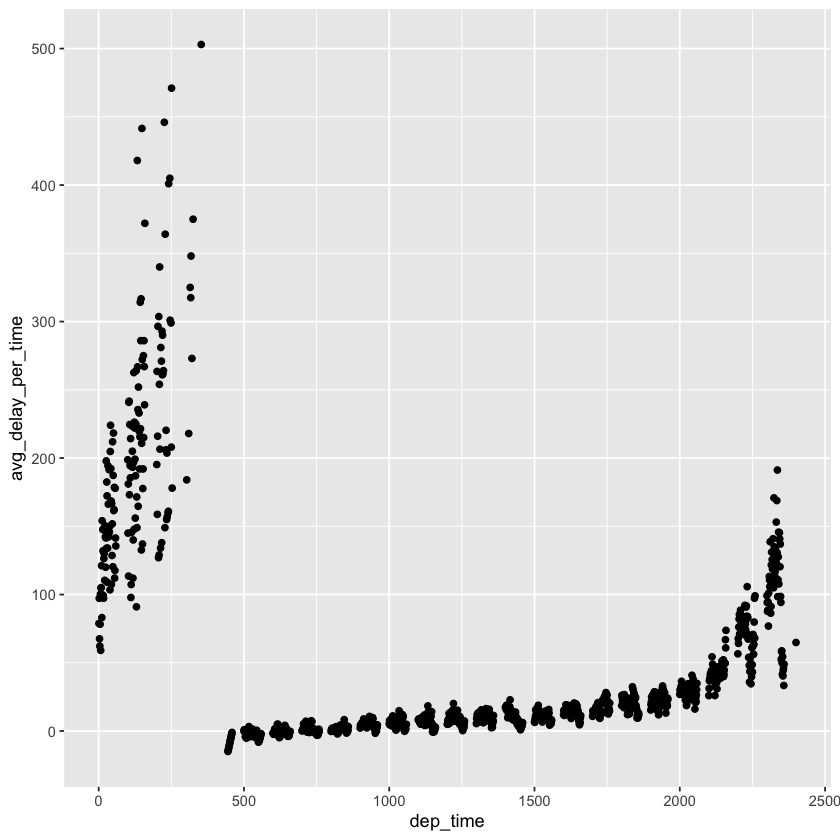

In [45]:
ggplot(
    avg_delay_per_time,
    mapping = aes(x = dep_time, y = avg_delay_per_time)
) +
    geom_point()


### 3.5.7.4

What happens if you supply a negative n to `slice_min()` and friends?

In [68]:
flights |>
    group_by(dest) |>
    slice_min(dep_delay, n = 1000000, with_ties = FALSE) |>
    summarise(n_flights = n()) |>
    arrange(desc(n_flights)) |>
    head(10)


dest,n_flights
<chr>,<int>
ORD,17283
ATL,17215
LAX,16174
BOS,15508
MCO,14082
CLT,14064
SFO,13331
FLL,12055
MIA,11728


In [70]:
flights |>
    group_by(dest) |>
    slice_min(dep_delay, n = -10000, with_ties = FALSE) |>
    summarise(n_flights = n()) |>
    arrange(desc(n_flights)) |>
    head(10)


dest,n_flights
<chr>,<int>
ORD,7283
ATL,7215
LAX,6174
BOS,5508
MCO,4082
CLT,4064
SFO,3331
FLL,2055
MIA,1728


In [60]:
?slice_min

slice                  package:dplyr                   R Documentation

_S_u_b_s_e_t _r_o_w_s _u_s_i_n_g _t_h_e_i_r _p_o_s_i_t_i_o_n_s

_D_e_s_c_r_i_p_t_i_o_n:

     ‘slice()’ lets you index rows by their (integer) locations. It
     allows you to select, remove, and duplicate rows. It is
     accompanied by a number of helpers for common use cases:

        • ‘slice_head()’ and ‘slice_tail()’ select the first or last
          rows.

        • ‘slice_sample()’ randomly selects rows.

        • ‘slice_min()’ and ‘slice_max()’ select rows with the smallest
          or largest values of a variable.

     If ‘.data’ is a grouped_df, the operation will be performed on
     each group, so that (e.g.) ‘slice_head(df, n = 5)’ will select the
     first five rows in each group.

_U_s_a_g_e:

     slice(.data, ..., .by = NULL, .preserve = FALSE)
     
     slice_head(.data, ..., n, prop, by = NULL)
     
     slice_tail(.data, ..., n, prop, by = NUL

### 3.5.7.5

Explain what `count()` does in terms of the dplyr verbs you just learned. What does the sort argument to `count()` do?

In [3]:
?count

count                  package:dplyr                   R Documentation

_C_o_u_n_t _t_h_e _o_b_s_e_r_v_a_t_i_o_n_s _i_n _e_a_c_h _g_r_o_u_p

_D_e_s_c_r_i_p_t_i_o_n:

     ‘count()’ lets you quickly count the unique values of one or more
     variables: ‘df %>% count(a, b)’ is roughly equivalent to ‘df %>%
     group_by(a, b) %>% summarise(n = n())’. ‘count()’ is paired with
     ‘tally()’, a lower-level helper that is equivalent to ‘df %>%
     summarise(n = n())’. Supply ‘wt’ to perform weighted counts,
     switching the summary from ‘n = n()’ to ‘n = sum(wt)’.

     ‘add_count()’ and ‘add_tally()’ are equivalents to ‘count()’ and
     ‘tally()’ but use ‘mutate()’ instead of ‘summarise()’ so that they
     add a new column with group-wise counts.

_U_s_a_g_e:

     count(x, ..., wt = NULL, sort = FALSE, name = NULL)
     
     ## S3 method for class 'data.frame'
     count(
       x,
       ...,
       wt = NULL,
       sort = FALSE,
   

In [5]:
flights |> count(origin, dest, sort = TRUE) |> head(10)

origin,dest,n
<chr>,<chr>,<int>
JFK,LAX,11262
LGA,ATL,10263
LGA,ORD,8857
JFK,SFO,8204
LGA,CLT,6168
EWR,ORD,6100
JFK,BOS,5898
LGA,MIA,5781
JFK,MCO,5464


In [4]:
flights |>
    group_by(origin, dest) |>
    summarise(n_flights = n(), .groups = "drop_last") |>
    arrange(desc(n_flights)) |>
    head(10)


origin,dest,n_flights
<chr>,<chr>,<int>
JFK,LAX,11262
LGA,ATL,10263
LGA,ORD,8857
JFK,SFO,8204
LGA,CLT,6168
EWR,ORD,6100
JFK,BOS,5898
LGA,MIA,5781
JFK,MCO,5464


### 3.5.7.6

Suppose we have the following tiny data frame:

In [5]:
df <- tibble(
    x = 1:5,
    y = c("a", "b", "a", "a", "b"),
    z = c("K", "K", "L", "L", "K")
)

#### a. Write down what you think the output will look like, then check if you were correct, and describe what `group_by()` does.

Group alone by returns a grouped data.frame or tibble. It looks like the same but all subsequent operations on it will be grouped (sums, averages, counts, &c).

In [6]:
df |> group_by(y)

x,y,z
<int>,<chr>,<chr>
1,a,K
2,b,K
3,a,L
4,a,L
5,b,K


#### b. Write down what you think the output will look like, then check if you were correct, and describe what `arrange()` does. Also comment on how it’s different from the `group_by()` in part (a).

`arrange()` sorts the data in the columns passed to it. Ascending is the default but descending order can be achieved with `desc()`. `arrange()` doesn't return grouped data like `group_by()`.

In [7]:
df |> arrange(y)

x,y,z
<int>,<chr>,<chr>
1,a,K
3,a,L
4,a,L
2,b,K
5,b,K


#### c. Write down what you think the output will look like, then check if you were correct, and describe what the pipeline does.

It will return the average value of `x` for each value of `y`. The pipeline passes the data returned from a previous operation as the first argument to the next function, thus allowing for an arbitrarily complex manipulation flow that would be very hard to read and reason about otherwise.

In [8]:
df |>
    group_by(y) |>
    summarize(mean_x = mean(x))


y,mean_x
<chr>,<dbl>
a,2.666667
b,3.500000


#### d. Write down what you think the output will look like, then check if you were correct, and describe what the pipeline does. Then, comment on what the message says.

It will return the average value of `x` for each distinct pair of `y` and `z`. The warning message is complaining that `summarise()` returns a grouped dataset and not the original one. Knowing this is important because all further operations will be done on the grouped data if the user doesn't remember to ungroup it. Using the `.by` argument could help here.

In [9]:
df |>
    group_by(y, z) |>
    summarize(mean_x = mean(x))


`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


y,z,mean_x
<chr>,<chr>,<dbl>
a,K,1.0
a,L,3.5
b,K,3.5


## 3.6 Case study: aggregates and sample size

Whenever you do any aggregation, it’s always a good idea to include a count (`n()`). That way, you can ensure that you’re not drawing conclusions based on very small amounts of data. We’ll demonstrate this with some baseball data from the Lahman package. Specifically, we will compare what proportion of times a player gets a hit (`H`) vs. the number of times they try to put the ball in play (`AB`):

In [10]:
install.packages("Lahman")
library(Lahman)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [11]:
batters <- Lahman::Batting |>
    group_by(playerID) |>
    summarize(
        performance = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
        n = sum(AB, na.rm = TRUE)
    )

batters |> head(10)


playerID,performance,n
<chr>,<dbl>,<int>
aardsda01,0.0000000,4
aaronha01,0.3049984,12364
aaronto01,0.2288136,944
aasedo01,0.0000000,5
abadan01,0.0952381,21
abadfe01,0.1111111,9
abadijo01,0.2244898,49
abbated01,0.2536137,3044
abbeybe01,0.1688889,225


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


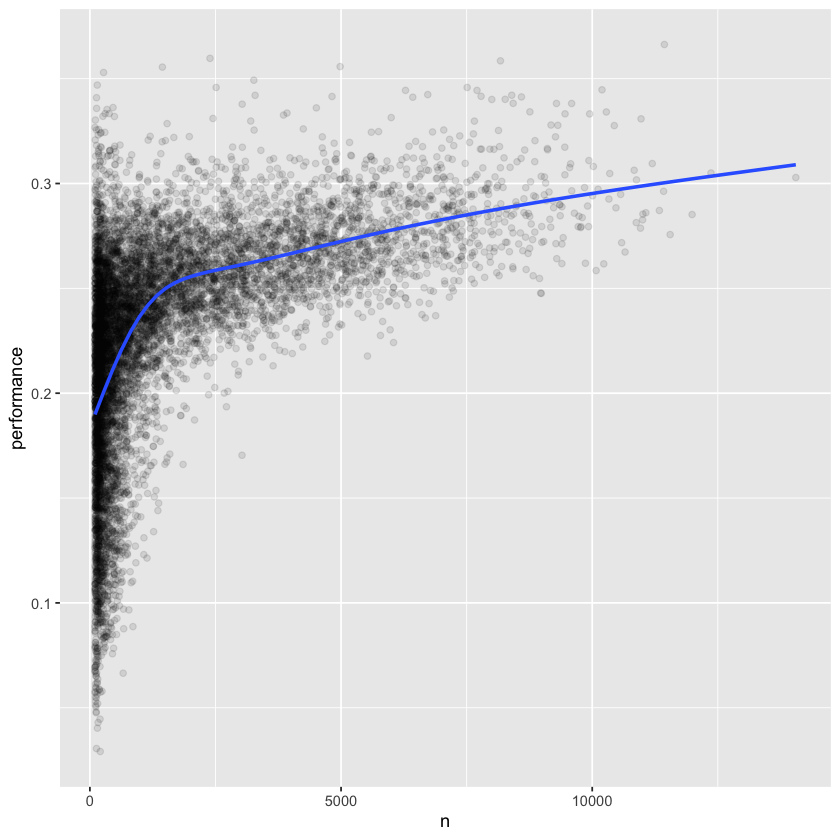

In [12]:
batters |>
    filter(n > 100) |>
    ggplot(aes(x = n, y = performance)) +
    geom_point(alpha = 1 / 10) +
    geom_smooth(se = FALSE)


1. The variation in performance is larger among players with fewer at-bats. The shape of this plot is very characteristic: whenever you plot a mean (or other summary statistics) vs. group size, you’ll see that the variation decreases as the sample size increases4.
2. There’s a positive correlation between skill (performance) and opportunities to hit the ball (n) because teams want to give their best batters the most opportunities to hit the ball.
